In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns


In [2]:
h1=pd.read_csv("H1.csv")

In [3]:
h1= h1.dropna()
h1_drop=h1.drop('Company',axis=1)
h1_drop=h1_drop.drop('Agent',axis=1)
h1_drop=h1_drop.drop('ReservationStatus',axis=1)

In [4]:
df_one_hot_encoder = pd.get_dummies(data=h1_drop, columns=['ArrivalDateMonth','Meal',
                                                'Country',
                                                 'MarketSegment',
                                                 'DistributionChannel',
                                                'ReservedRoomType',
                                                 'AssignedRoomType',
                                                'DepositType',
                                                'CustomerType',
                                                 'ReservationStatusDate'])

X_hot = df_one_hot_encoder.drop('IsCanceled',axis=1)
y_hot = df_one_hot_encoder['IsCanceled']

In [6]:
from sklearn.model_selection import train_test_split

X_train_hot, X_test_hot, y_train_hot, y_test_hot = train_test_split(
    X_hot, y_hot, test_size=0.2, random_state=42)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_hot,y_train_hot)
y_pred_hot = knn.predict(X_test_hot)


              precision    recall  f1-score   support

           0       0.82      0.87      0.84      5742
           1       0.58      0.48      0.53      2178

    accuracy                           0.76      7920
   macro avg       0.70      0.68      0.68      7920
weighted avg       0.75      0.76      0.76      7920

Confusion matrix : 
[[4998  744]
 [1131 1047]]
0.7632575757575758


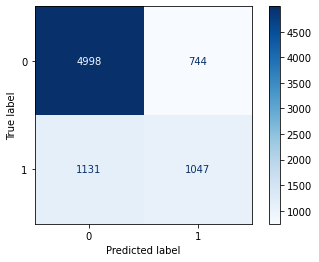

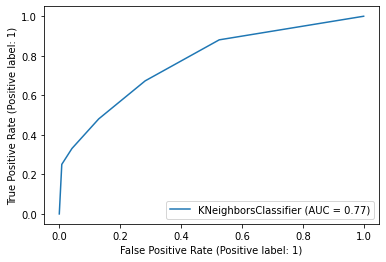

In [34]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score, plot_confusion_matrix,plot_roc_curve
print(classification_report(y_test_hot,y_pred_hot))
print('Confusion matrix : \n{}'.format(confusion_matrix(y_test_hot,y_pred_hot)))
print(accuracy_score(y_test_hot,y_pred_hot))

plot_confusion_matrix(knn, X_test_hot, y_test_hot,cmap=plt.cm.Blues)
plot_roc_curve(knn, X_test_hot, y_test_hot)

In [35]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train_hot,y_train_hot)
y_pred_hot = lr.predict(X_test_hot)

C:\Users\rishabhstha\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.83      0.94      0.88      5742
           1       0.76      0.51      0.61      2178

    accuracy                           0.82      7920
   macro avg       0.80      0.72      0.75      7920
weighted avg       0.81      0.82      0.81      7920

Confusion matrix : 
[[5389  353]
 [1067 1111]]
0.8207070707070707


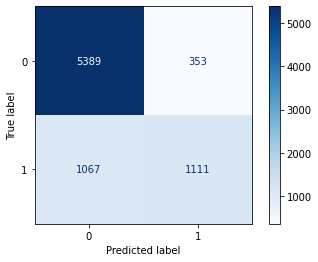

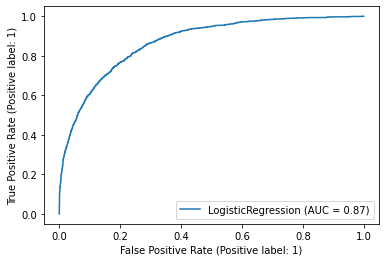

In [36]:
print(classification_report(y_test_hot,y_pred_hot))
print('Confusion matrix : \n{}'.format(confusion_matrix(y_test_hot,y_pred_hot)))
print(accuracy_score(y_test_hot,y_pred_hot))
plot_confusion_matrix(lr, X_test_hot, y_test_hot,cmap=plt.cm.Blues)
plot_roc_curve(lr, X_test_hot, y_test_hot)

In [31]:
#using GridSearch CV for logistic regression
#grid search cv for random forest
from sklearn.model_selection import GridSearchCV

lr=LogisticRegression()
param_grid = { 
    
    'solver':['newton-cg', 'lbfgs', 'liblinear'],
    'max_iter':[100,50,200]
}
scores=['precision','recall']
for score in scores:
    
    print("# Tuning hyper-parameters for %s" % score)
    print()
    
    clf=GridSearchCV(estimator=lr, param_grid=param_grid, scoring='%s_macro' % score, cv=3 )
    clf.fit(X_train_hot, y_train_hot)
    
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test_hot, clf.predict(X_test_hot)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision



C:\Users\rishabhstha\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\Users\rishabhstha\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\Users\rishabhstha\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\rishabhstha\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

C:\Users\rishabhstha\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\Users\rishabhstha\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\rishabhstha\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\rishabhstha\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase th

Best parameters set found on development set:

{'max_iter': 200, 'solver': 'newton-cg'}

Grid scores on development set:

0.858 (+/-0.007) for {'max_iter': 100, 'solver': 'newton-cg'}
0.806 (+/-0.006) for {'max_iter': 100, 'solver': 'lbfgs'}
0.837 (+/-0.017) for {'max_iter': 100, 'solver': 'liblinear'}
0.852 (+/-0.009) for {'max_iter': 50, 'solver': 'newton-cg'}
0.721 (+/-0.068) for {'max_iter': 50, 'solver': 'lbfgs'}
0.823 (+/-0.029) for {'max_iter': 50, 'solver': 'liblinear'}
0.859 (+/-0.005) for {'max_iter': 200, 'solver': 'newton-cg'}
0.798 (+/-0.011) for {'max_iter': 200, 'solver': 'lbfgs'}
0.840 (+/-0.014) for {'max_iter': 200, 'solver': 'liblinear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      5742
           1       0.83      0.73      0.77      2178

    accuracy                      

C:\Users\rishabhstha\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\Users\rishabhstha\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\Users\rishabhstha\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\rishabhstha\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

C:\Users\rishabhstha\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\Users\rishabhstha\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\rishabhstha\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\rishabhstha\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase th

Best parameters set found on development set:

{'max_iter': 200, 'solver': 'newton-cg'}

Grid scores on development set:

0.828 (+/-0.002) for {'max_iter': 100, 'solver': 'newton-cg'}
0.729 (+/-0.008) for {'max_iter': 100, 'solver': 'lbfgs'}
0.804 (+/-0.031) for {'max_iter': 100, 'solver': 'liblinear'}
0.820 (+/-0.001) for {'max_iter': 50, 'solver': 'newton-cg'}
0.618 (+/-0.075) for {'max_iter': 50, 'solver': 'lbfgs'}
0.769 (+/-0.075) for {'max_iter': 50, 'solver': 'liblinear'}
0.829 (+/-0.003) for {'max_iter': 200, 'solver': 'newton-cg'}
0.752 (+/-0.007) for {'max_iter': 200, 'solver': 'lbfgs'}
0.808 (+/-0.023) for {'max_iter': 200, 'solver': 'liblinear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      5742
           1       0.83      0.73      0.77      2178

    accuracy                      

C:\Users\rishabhstha\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
